In [1]:
import numpy as np

**From the web**

In [16]:
#import generated data
data = np.load('X_array.npy').T
# X = X.T[:,0] 
# X1 = X.T[:,0]
N = data[:,0].size
C = 50

In [13]:
X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) # extended data 

Z = np.hstack((X0_bar, - X1_bar)) # as in (22)
lam = 1./C

def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
        .5*lam*np.sum(w*w)) - .5*lam*w[-1]*w[-1] # no bias 

def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)
    g[-1] -= lam*w[-1] # no weight decay on bias
    return g

eps = 1e-6
def num_grad(w):
    g = np.zeros_like(w)
    for i in xrange(len(w)):
        wp = w.copy()
        wm = w.copy()
        wp[i] += eps 
        wm[i] -= eps 
        g[i] = (cost(wp) - cost(wm))/(2*eps)
    return g 

w0 = np.random.randn(X0_ext.shape[0], 1) 
g1 = grad(w0)
g2 = num_grad(w0)
diff = np.linalg.norm(g1 - g2)
print('Gradient different: %f' %diff)

NameError: name 'X0_ext' is not defined

In [ ]:
def grad_descent(w0, eta):
    w = w0
    it = 0 
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        if (it % 10000) == 1:
            print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break 
    return w 
w0 = np.random.randn(X0_ext.shape[0], 1) 
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
print(w_hinge.T, b_hinge)

**My own algorithm**

In [8]:
#Initialize parameters and functions
import numpy as np
import matplotlib.pyplot as plt


data = np.load('data.npy')
C = 50
learning_rate = 0.1
stopping_error = 1e-5
number_of_axis = data[0, :].size - 1;
number_of_samples = data[:,0].size;

def plot_data(data):
    color = ["blue", "red"]
    for i in range(0, number_of_samples):
        if (data[i, number_of_axis] > 0):
            try:
                color[i] = 'blue'
            except Exception as e:
                color.append('blue')
        else:
            try:
                color[i] = 'red'
            except Exception as e:
                color.append('red')
    plt.scatter(data[:,0], data[:,1], c = color )


def support_vectors(w0, b0, data):
    error_set = np.zeros((number_of_samples, number_of_axis)); #This is for it to work for all size of the data
    for i in range(0, number_of_samples - 1):
        xn = np.zeros((number_of_axis,1))
        xn = data[i, 0:number_of_axis].T  #Extract the vector and transpose the matrix
        dot_product = np.dot(w0, xn);
        if ((1 - data[i, number_of_axis]*(dot_product + b0)) > 0):
            error_set.append(xn);


def gradient_w(w0, data):
    return 0

def gradient_b(b0):
    return 0


def gradient_descent(w0, b0, data):
    w = w0
    b = b0
    iteration = 0
    for interation in range(0, 10000):
        break;
    return 0



3


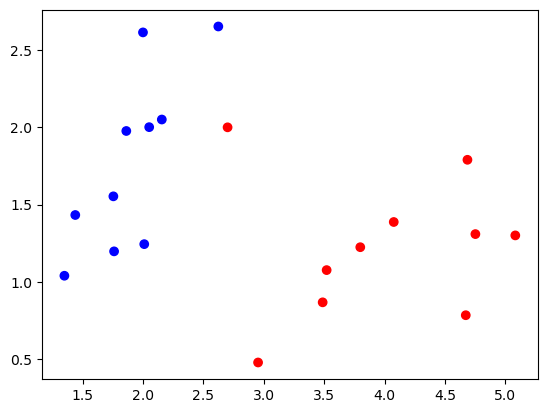

In [46]:
plot_data(data)


In [82]:
xn = data[0, 0:number_of_axis].T
print(xn)

[2.05084632 2.00111793]


In [121]:
error_set = np.zeros((0, number_of_axis))
temp_xn = np.copy(xn)
temp_xn.resize((1,2))
error_set = np.append(error_set, temp_xn, axis = 0)
print(xn.shape)
print(error_set.shape)

(2,)
(1, 2)
